# Basic Visualization and Preprocessing

In [78]:
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

mpl.rcParams['figure.figsize'] = (8,6)
mpl.rcParams['axes.grid'] = False


zip_path = tf.keras.utils.get_file(fname='data.txt')
csv_path, _ = os.path.splitext(zip_path)


Start by sub-sampling the data from 10-minute intervals to one-hour intervals:

In [79]:
df = pd.read_csv('data.csv', sep="\\s+") # pd.read_csv(csv_path) wasn't working for some reason
# Slice [start:stop:step], starting from index 5 take every 6th record.
# df = df[5::6] # Why would we do this?

df.index = pd.to_datetime(df['Timestamp'], format="%Y-%m-%d:%H:%M:%S.%f")

df.drop(["Timestamp", "Source"], axis=1, inplace=True)

In [80]:
df.head()

,Bt_med,Bt_min,Bt_max,Bx_med,Bx_min,Bx_max,By_med,By_min,By_max,Bz_med,...,Theta_max,Dens_med,Dens_min,Dens_max,Speed_med,Speed_min,Speed_max,Temp_med,Temp_min,Temp_max
Timestamp,,,,,,,,,,,,,,,,,,,,,
2025-03-13 00:00:00,7.21,7.03,7.26,2.60,1.66,3.09,-0.74,-2.51,0.94,-6.64,...,-56.57,0.18,0.11,0.26,555.24,547.02,561.65,136135,121117,153154
2025-03-13 00:05:00,6.98,6.95,7.03,2.03,0.53,2.41,-0.43,-0.83,-0.30,-6.68,...,-69.39,0.16,0.10,0.39,558.27,551.99,567.91,127127,92475,195859
2025-03-13 00:10:00,6.64,6.26,6.82,3.81,2.98,4.89,-0.55,-1.09,-0.21,-5.37,...,-42.48,0.11,0.10,0.19,536.44,520.12,553.48,118924,85942,154367
2025-03-13 00:15:00,6.27,5.25,6.51,3.85,2.89,4.99,-3.39,-3.59,0.28,-2.40,...,-16.41,0.10,0.10,0.23,548.70,533.30,553.31,176311,92195,243251
2025-03-13 00:20:00,6.55,6.50,6.73,5.86,5.55,6.63,-2.40,-3.07,-1.03,1.04,...,23.18,0.10,0.10,0.10,534.14,499.73,539.49,246684,60255,269295


In [81]:
for col in df.columns:
    df[col].replace(to_replace=-99999.00, value=float("nan"), inplace=True)

/tmp/ipykernel_109734/721162914.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].replace(to_replace=-99999.00, value=float("nan"), inplace=True)


In [82]:
for col in df.columns:
    df[col] = df[col].interpolate(method='linear')

In [83]:
df.describe().transpose()
#df[df['Bt_min'] < -9999]

,count,mean,std,min,25%,50%,75%,max
Bt_med,1941.0,6.417362,1.851111,2.94,4.96,6.25,7.25,12.84
Bt_min,1941.0,6.155948,1.901632,1.65,4.78,5.83,7.03,12.82
Bt_max,1941.0,6.573691,1.833456,3.63,5.09,6.47,7.41,12.93
Bx_med,1941.0,2.993053,2.501221,-4.27,1.33,3.14,4.58,9.95
Bx_min,1941.0,2.280536,2.679856,-8.51,0.41,2.35,4.08,9.70
Bx_max,1941.0,3.642483,2.351824,-3.50,2.24,3.75,5.03,10.61
By_med,1941.0,-2.641790,2.655928,-9.53,-4.52,-2.99,-0.84,6.17
By_min,1941.0,-3.463496,2.435001,-9.74,-5.13,-3.68,-1.99,5.54
By_max,1941.0,-1.706940,2.850805,-8.67,-3.64,-2.07,0.25,7.30
Bz_med,1941.0,-1.734034,3.331330,-10.65,-4.33,-1.80,0.76,7.30


In [84]:
df.head()

,Bt_med,Bt_min,Bt_max,Bx_med,Bx_min,Bx_max,By_med,By_min,By_max,Bz_med,...,Theta_max,Dens_med,Dens_min,Dens_max,Speed_med,Speed_min,Speed_max,Temp_med,Temp_min,Temp_max
Timestamp,,,,,,,,,,,,,,,,,,,,,
2025-03-13 00:00:00,7.21,7.03,7.26,2.60,1.66,3.09,-0.74,-2.51,0.94,-6.64,...,-56.57,0.18,0.11,0.26,555.24,547.02,561.65,136135.0,121117.0,153154.0
2025-03-13 00:05:00,6.98,6.95,7.03,2.03,0.53,2.41,-0.43,-0.83,-0.30,-6.68,...,-69.39,0.16,0.10,0.39,558.27,551.99,567.91,127127.0,92475.0,195859.0
2025-03-13 00:10:00,6.64,6.26,6.82,3.81,2.98,4.89,-0.55,-1.09,-0.21,-5.37,...,-42.48,0.11,0.10,0.19,536.44,520.12,553.48,118924.0,85942.0,154367.0
2025-03-13 00:15:00,6.27,5.25,6.51,3.85,2.89,4.99,-3.39,-3.59,0.28,-2.40,...,-16.41,0.10,0.10,0.23,548.70,533.30,553.31,176311.0,92195.0,243251.0
2025-03-13 00:20:00,6.55,6.50,6.73,5.86,5.55,6.63,-2.40,-3.07,-1.03,1.04,...,23.18,0.10,0.10,0.10,534.14,499.73,539.49,246684.0,60255.0,269295.0


Here's a basic view of three variables: Temperature in Celsius, Pressure in millibars, and density in g/m**3

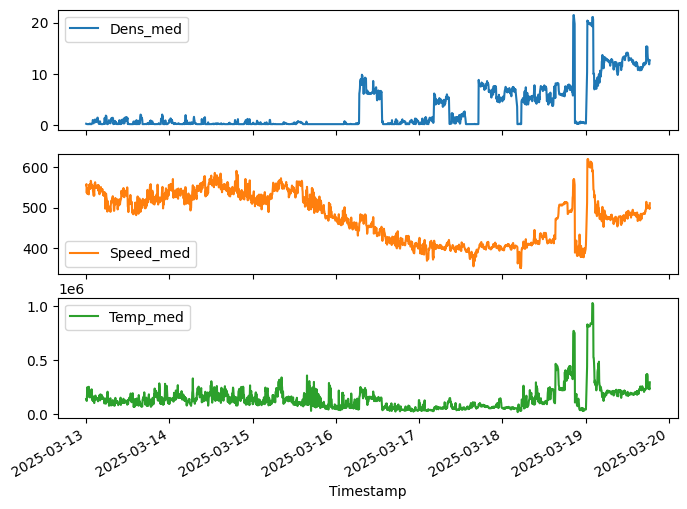

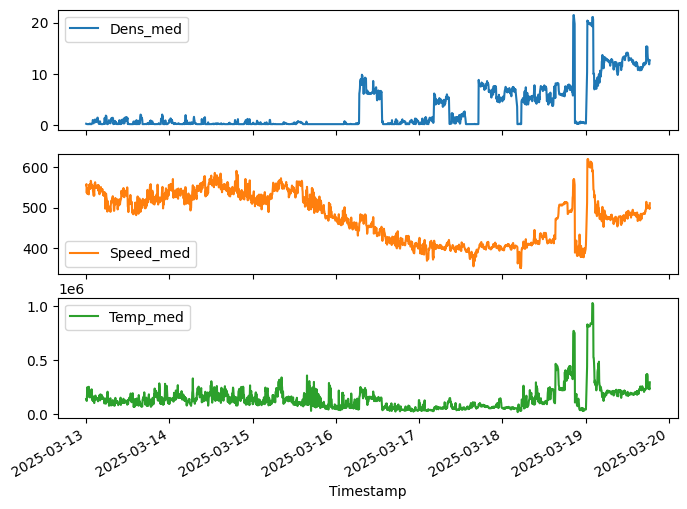

In [85]:
plot_cols = ['Dens_med', 'Speed_med', 'Temp_med']
plot_features = df[plot_cols]
plot_features.index = df.index
_ = plot_features.plot(subplots=True)

plot_features = df[plot_cols]
plot_features.index = df.index
_ = plot_features.plot(subplots=True)

Next, look at the statistics of the dataset and see what you can infer:

In [86]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Bt_med,1941.0,6.417362,1.851111,2.94,4.96,6.25,7.25,12.84
Bt_min,1941.0,6.155948,1.901632,1.65,4.78,5.83,7.03,12.82
Bt_max,1941.0,6.573691,1.833456,3.63,5.09,6.47,7.41,12.93
Bx_med,1941.0,2.993053,2.501221,-4.27,1.33,3.14,4.58,9.95
Bx_min,1941.0,2.280536,2.679856,-8.51,0.41,2.35,4.08,9.70
Bx_max,1941.0,3.642483,2.351824,-3.50,2.24,3.75,5.03,10.61
By_med,1941.0,-2.641790,2.655928,-9.53,-4.52,-2.99,-0.84,6.17
By_min,1941.0,-3.463496,2.435001,-9.74,-5.13,-3.68,-1.99,5.54
By_max,1941.0,-1.706940,2.850805,-8.67,-3.64,-2.07,0.25,7.30
Bz_med,1941.0,-1.734034,3.331330,-10.65,-4.33,-1.80,0.76,7.30


# Feature Engineering

You must understand your data to be sure that you're passing the model appropriately-formatted data.

This should be much easier for the model to interpret:

# Split the data


70-20-10 Training, validation, test sets.

In [87]:
column_indices = {name: i for i, name in enumerate(df.columns)}

n = len(df)
train_df = df[0:int(n*0.9)] # 70
val_df = df[int(n*0.7):int(n*0.9)]  # 20
test_df = df[int(n*0.9):] # 10

num_features = df.shape[1]
num_features

27

In [88]:
train_df

,Bt_med,Bt_min,Bt_max,Bx_med,Bx_min,Bx_max,By_med,By_min,By_max,Bz_med,...,Theta_max,Dens_med,Dens_min,Dens_max,Speed_med,Speed_min,Speed_max,Temp_med,Temp_min,Temp_max
Timestamp,,,,,,,,,,,,,,,,,,,,,
2025-03-13 00:00:00,7.21,7.03,7.26,2.60,1.66,3.09,-0.74,-2.51,0.94,-6.64,...,-56.57,0.18,0.11,0.26,555.24,547.02,561.65,136135.0,121117.0,153154.0
2025-03-13 00:05:00,6.98,6.95,7.03,2.03,0.53,2.41,-0.43,-0.83,-0.30,-6.68,...,-69.39,0.16,0.10,0.39,558.27,551.99,567.91,127127.0,92475.0,195859.0
2025-03-13 00:10:00,6.64,6.26,6.82,3.81,2.98,4.89,-0.55,-1.09,-0.21,-5.37,...,-42.48,0.11,0.10,0.19,536.44,520.12,553.48,118924.0,85942.0,154367.0
2025-03-13 00:15:00,6.27,5.25,6.51,3.85,2.89,4.99,-3.39,-3.59,0.28,-2.40,...,-16.41,0.10,0.10,0.23,548.70,533.30,553.31,176311.0,92195.0,243251.0
2025-03-13 00:20:00,6.55,6.50,6.73,5.86,5.55,6.63,-2.40,-3.07,-1.03,1.04,...,23.18,0.10,0.10,0.10,534.14,499.73,539.49,246684.0,60255.0,269295.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-03-19 01:55:00,12.25,12.24,12.27,7.87,7.59,8.17,-7.51,-8.86,-7.16,-5.21,...,-17.43,21.05,20.84,21.12,590.70,588.90,592.30,1025981.0,1024103.0,1034619.0
2025-03-19 02:00:00,12.24,12.21,12.25,7.74,7.39,8.17,-7.06,-8.47,-5.54,-5.83,...,-22.57,21.04,20.70,21.19,588.70,567.60,590.20,1030086.0,1020612.0,1038440.0
2025-03-19 02:05:00,12.35,12.29,12.39,7.62,7.09,7.74,-8.50,-8.60,-8.23,-4.97,...,-22.86,21.09,20.99,21.11,592.30,590.90,592.40,1024695.0,1021465.0,1031729.0


# Normalize the data


For simplicity, use simple average&mdash;should be done using a moving average.

In [89]:
train_mean = train_df.mean()
train_std = train_df.std()

train_df = (train_df - train_mean) / train_std
val_df = (val_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std


Peek at the distribution of the features:

/tmp/ipykernel_109734/622527561.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ = ax.set_xticklabels(df.keys(), rotation=90)


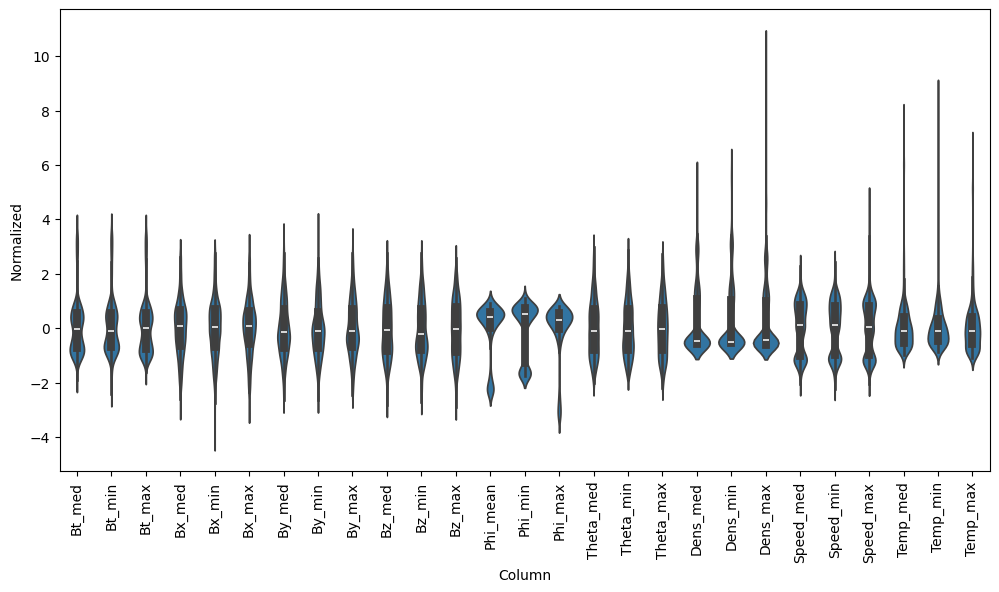

In [90]:
df_std = (df - train_mean) / train_std
df_std = df_std.melt(var_name='Column', value_name='Normalized')
plt.figure(figsize=(12,6))
ax = sns.violinplot(x='Column', y='Normalized', data=df_std)
_ = ax.set_xticklabels(df.keys(), rotation=90)

# Data Windowing

Make a set of predictions based on a window of consecutive samples from the data. Window the data so it can be reused in many models.

## 1. Indices & offsets

In [91]:
class WindowGenerator():
    def __init__(self, input_width, label_width, shift, train_df=train_df, val_df=val_df, test_df=test_df, label_columns=None):
        # Store the raw data:
        self.train_df = train_df
        self.val_df = val_df
        self.test_df = test_df 
         
        # Work out the label column indices:
        self.label_columns = label_columns
        if label_columns is not None:
            self.label_columns_indices = {name: i for i, name in enumerate(label_columns)}
        self.column_indices = {name: i for i, name in enumerate(train_df.columns)}
        
        # Work out the window parameters:
        self.input_width = input_width
        self.label_width = label_width
        self.shift = shift
        
        self.total_window_size = input_width + shift
        
        self.input_slice = slice(0, input_width)
        self.input_indices = np.arange(self.total_window_size)[self.input_slice]
        
        self.label_start = self.total_window_size - self.label_width
        self.labels_slice = slice(self.label_start, None)
        self.label_indices = np.arange(self.total_window_size)[self.labels_slice]
        
    def __repr__(self):
        return '\n'.join([
            f'Total window size: {self.total_window_size}',
            f'Input indices: {self.input_indices}', 
            f'Label indices: {self.label_indices}', 
            f'Label column name(s) {self.label_columns}'
        ])

In [92]:
w1 = WindowGenerator(input_width=24, label_width=1, shift=24, label_columns=['Dens_med'])
w1

Total window size: 48
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [47]
Label column name(s) ['Dens_med']

In [93]:
w2 = WindowGenerator(input_width=6, label_width=1, shift=1, label_columns='Dens_med')
w2

Total window size: 7
Input indices: [0 1 2 3 4 5]
Label indices: [6]
Label column name(s) Dens_med

## 2. Split

In [94]:
def split_window(self, features):
  inputs = features[:, :self.input_slice, :]
  labels = features[:, self.labels_slice, :]
  if self.label_columns is not None:
    labels = tf.stack([labels[:, :, self.column_indices[name]] for name in self.label_columns], axis=-1)

  # Slicing doesn't preserve static shape information, so set the shapes
  # manually. This way the `tf.data.Datasets` are easier to inspect.
  inputs.set_shape([None, self.input_width, None])
  labels.set_shape([None, self.label_width, None])

  return inputs, labels

WindowGenerator.split_window = split_window

In [95]:
def split_window(self, features):
  inputs = features[:, self.input_slice, :]
  labels = features[:, self.labels_slice, :]
  inputs.set_shape([None, self.input_width, None])
  labels.set_shape([None, self.label_width, None])

  return inputs, labels

WindowGenerator.split_window = split_window

In [96]:
# Stack three slices, the length of the total window.
example_window = tf.stack([np.array(train_df[:w2.total_window_size]),
                           np.array(train_df[100:100+w2.total_window_size]),
                           np.array(train_df[200:200+w2.total_window_size])])

example_inputs, example_labels = w2.split_window(example_window)

print('All shapes are: (batch, time, features)')
print(f'Window shape: {example_window.shape}')
print(f'Inputs shape: {example_inputs.shape}')
print(f'Labels shape: {example_labels.shape}')

All shapes are: (batch, time, features)
Window shape: (3, 7, 27)
Inputs shape: (3, 6, 27)
Labels shape: (3, 1, 27)


In [97]:
# Stack three slices, the length of the total window:
example_window = tf.stack([np.array(train_df[:w2.total_window_size]),
                           np.array(train_df[100:(100+w2.total_window_size)]),
                           np.array(train_df[200:(200+w2.total_window_size)])])
example_window

<tf.Tensor: shape=(3, 7, 27), dtype=float64, numpy=
array([[[ 0.52352882,  0.55499722,  0.47111236, -0.13725355,
         -0.2163751 , -0.20976857,  0.73304812,  0.38737839,
          0.95089534, -1.5621953 , -1.45393634, -1.63444672,
          0.80393697, -1.74778441,  0.52342419, -1.50270059,
         -1.42101294, -1.46022471, -0.55706942, -0.54483708,
         -0.57445079,  1.22902163,  1.26022351,  1.11918964,
          0.04717549,  0.15945568, -0.12306162],
        [ 0.39350624,  0.51088056,  0.33994541, -0.36704736,
         -0.64214203, -0.50106325,  0.85250001,  1.0935363 ,
          0.50884104, -1.57463833, -1.43157324, -1.7813911 ,
          0.71589153,  0.68955059,  0.70993915, -1.62047867,
         -1.61809791, -1.83238017, -0.56281118, -0.54791962,
         -0.54090819,  1.27725596,  1.34136239,  1.21371309,
         -0.03091373, -0.11111102,  0.20984589],
        [ 0.20129896,  0.13037439,  0.22018429,  0.35055435,
          0.28098097,  0.56130556,  0.80626057,  0.984249

## 3. Plot

In [98]:
w2.example = example_inputs, example_labels

In [99]:
def plot(self, model=None,  plot_col='Dens_med', max_subplots=3):
    inputs, labels = self.example
    plt.figure(figsize=(12, 8))
    plot_col_index = self.column_indices[plot_col]
    max_n = min(max_subplots, len(inputs))
    for n in range(max_n):
        plt.subplot(max_n, 1, n+1)
        plt.ylabel(f'{plot_col} [normed]')
        plt.plot(self.input_indices, inputs[n, :, plot_col_index], label='Inputs', marker='.', zorder=-10)
        
        if self.label_columns:
            label_col_index = self.label_columns_indices.get(plot_col, None)
        else:
            label_col_index = plot_col_index
        
        if label_col_index is None:
            continue
        
        plt.scatter(self.label_indices, labels[n, :, label_col_index], edgecolors='k', label='Labels', c='#2ca02c', s=64)
        if model is not None:
            predictions = model(inputs)
            plt.scatter(self.label_indices, predictions[n, :, label_col_index], marker='X', edgecolors='k', label='Predictions', c='#ff7f0e', s=64)
        
        if n == 0:
            plt.legend()
            
    plt.xlabel('Time [?]')

WindowGenerator.plot = plot  

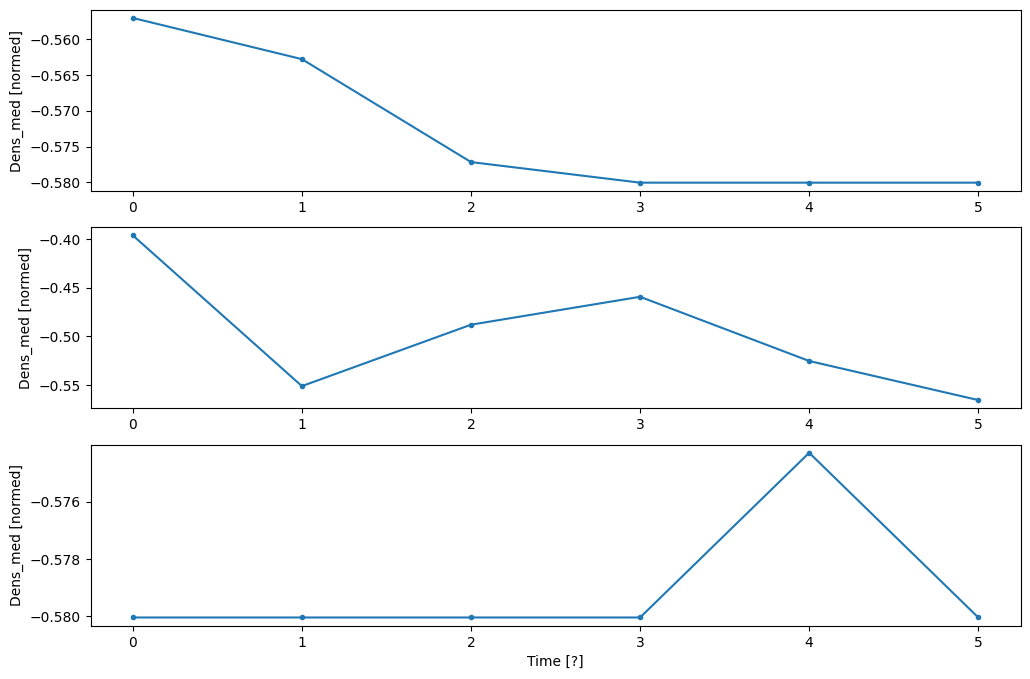

In [100]:
w2.plot()

## 4. Create `tf.data.Datasets`

In [101]:
def make_dataset(self, data):
    data = np.array(data, dtype=np.float32)
    ds = tf.keras.utils.timeseries_dataset_from_array(
        data=data,
        targets=None,
        sequence_length=self.total_window_size,
        sequence_stride=1,
        shuffle=True,
        batch_size=32
    )
    
    ds = ds.map(self.split_window)
    
    return ds

WindowGenerator.make_dataset = make_dataset

Add properties for accessing the data as tf.data.Dataset s using the make_dataset method defined above. Also, add a standard example batch for easy access and plotting:

In [102]:
@property
def train(self):
    return self.make_dataset(self.train_df)

@property
def val(self):
    return self.make_dataset(self.val_df)

@property
def test(self):
    return self.make_dataset(self.test_df)

@property
def example(self):
    """Get and cache an examplel batch of `inputs, labels` for plotting."""
    result = getattr(self, '_example', None)
    if result is None:
        result = next(iter(self.train))
        self._example = result
    return result

WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.test = test
WindowGenerator.example = example

In [103]:
w2.train.element_spec

(TensorSpec(shape=(None, 6, 27), dtype=tf.float32, name=None),
 TensorSpec(shape=(None, 1, 27), dtype=tf.float32, name=None))

In [104]:
for example_inputs, example_labels in w2.train.take(1):
    print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
    print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 6, 27)
Labels shape (batch, time, features): (32, 1, 27)


# Single Step Models

Configure a WindowGenerator object to produce these single-step (input, label) pairs:

In [105]:
single_step_window = WindowGenerator(input_width=1, label_width=1, shift=1, label_columns=['Dens_med'])
single_step_window

Total window size: 2
Input indices: [0]
Label indices: [1]
Label column name(s) ['Dens_med']

In [106]:
for example_inputs, example_labels in single_step_window.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 1, 27)
Labels shape (batch, time, features): (32, 1, 27)


## Baseline

In [107]:
class Baseline(tf.keras.Model):
    def __init__(self, label_index=None):
        super().__init__()
        self.label_index = label_index
        
    def call(self, inputs):
        if self.label_index is None:
            return inputs
        result = inputs[:, :, self.label_index]
        return result[:, :, tf.newaxis]

Instantiate and evaluate this model:


In [108]:
baseline = Baseline(label_index=column_indices['Dens_med'])

baseline.compile(loss=tf.keras.losses.MeanSquaredError(), metrics=[tf.keras.metrics.MeanAbsoluteError()])

val_performance = {}
performance = {}
val_performance['Baseline'] = baseline.evaluate(single_step_window.val, return_dict=True)
performance['Baseline'] = baseline.evaluate(single_step_window.test, verbose=0, return_dict=True)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.4256 - mean_absolute_error: 1.3564  


In [109]:
wide_window = WindowGenerator(input_width=24, label_width=24, shift=1, label_columns=['Dens_med'])

wide_window

Total window size: 25
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]
Label column name(s) ['Dens_med']

In [110]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', baseline(wide_window.example[0]).shape)

Input shape: (32, 24, 27)
Output shape: (32, 24, 1)


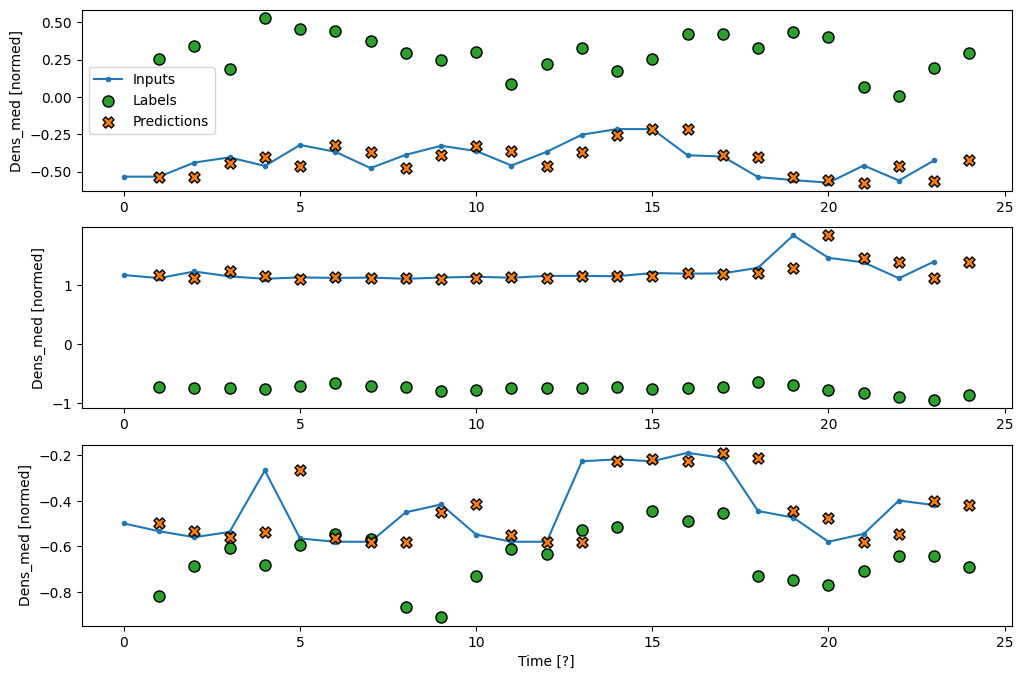

In [111]:
wide_window.plot(baseline)

## Linear Model

In [112]:
linear = tf.keras.Sequential([tf.keras.layers.Dense(units=1)])

In [113]:
print('Input shape:', single_step_window.example[0].shape)
print('Output shape:', linear(single_step_window.example[0]).shape)

Input shape: (32, 1, 27)
Output shape: (32, 1, 1)


In [114]:
MAX_EPOCHS = 20

def compile_and_fit(model, window, patience=2):
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=patience, mode='min')
    
    model.compile(loss=tf.keras.losses.MeanSquaredError(), optimizer=tf.keras.optimizers.Adam(), metrics=[tf.keras.metrics.MeanAbsoluteError()])
    
    history = model.fit(window.train, epochs=MAX_EPOCHS, validation_data=window.val, callbacks=[early_stopping])
    
    return history

In [115]:
history = compile_and_fit(linear, single_step_window)

val_performance['Linear'] = linear.evaluate(single_step_window.val, return_dict=True)
performance['Linear'] = linear.evaluate(single_step_window.test, verbose=0, return_dict=True)

Epoch 1/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.5174 - mean_absolute_error: 0.9480 - val_loss: 1.7903 - val_mean_absolute_error: 1.0384
Epoch 2/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.2729 - mean_absolute_error: 0.8758 - val_loss: 1.6324 - val_mean_absolute_error: 0.9892
Epoch 3/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1377 - mean_absolute_error: 0.8276 - val_loss: 1.5471 - val_mean_absolute_error: 0.9589
Epoch 4/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0313 - mean_absolute_error: 0.7864 - val_loss: 1.4928 - val_mean_absolute_error: 0.9370
Epoch 5/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9947 - mean_absolute_error: 0.7687 - val_loss: 1.4653 - val_mean_absolute_error: 0.9249
Epoch 6/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9399 - mean_absolute_error: 0.7483 - val_loss: 1.4467 - val_mean_absolute_error: 0.9154
Epoch 7/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9224 - mean_absolute_error: 0.7380 - val_loss: 1.436

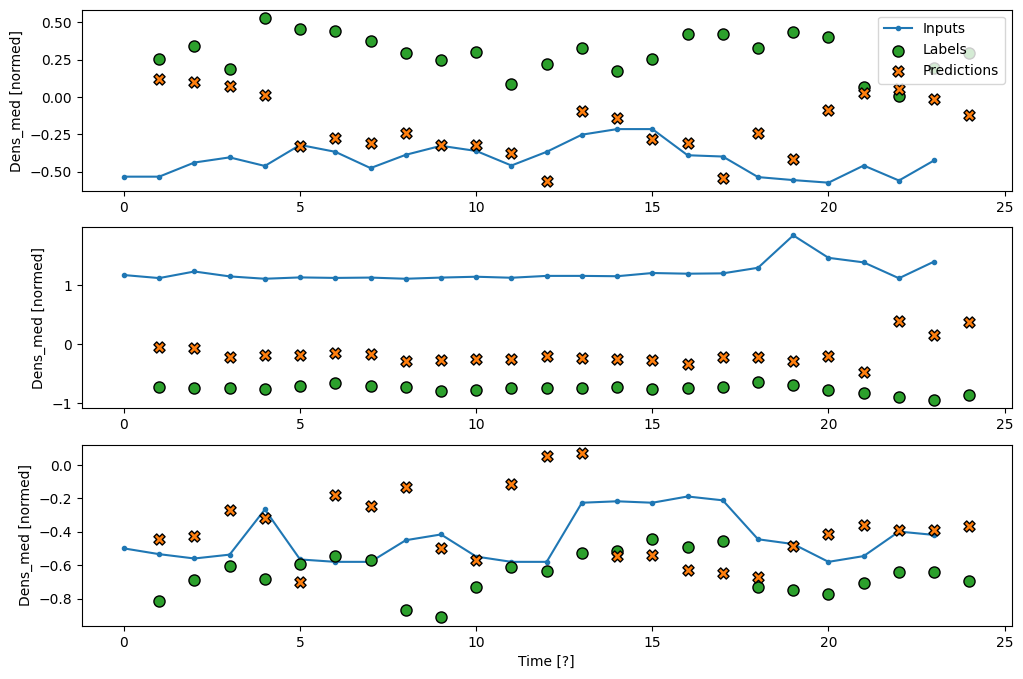

In [116]:
wide_window.plot(linear)

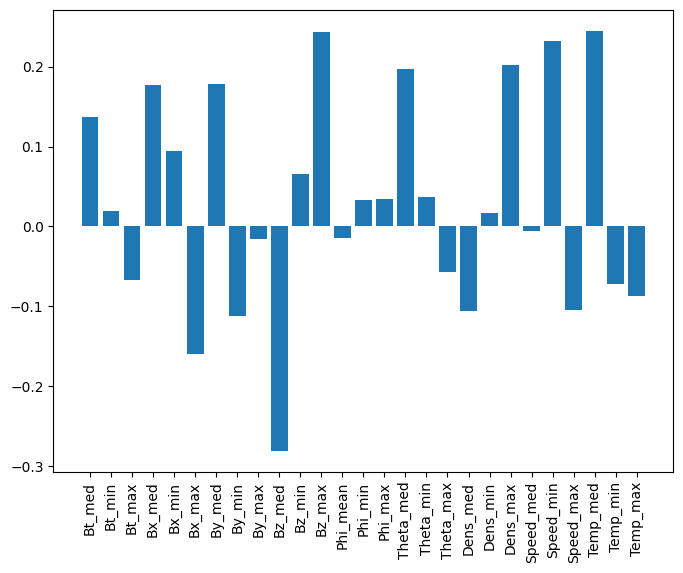

In [117]:
plt.bar(x=range(len(train_df.columns)),
        height=linear.layers[0].kernel[:,0].numpy())
axis=plt.gca()
axis.set_xticks(range(len(train_df.columns)))
_ = axis.set_xticklabels(train_df.columns, rotation=90)

## Dense

In [118]:
dense = tf.keras.Sequential([
    tf.keras.layers.Dense(units=27, activation='relu'),
    tf.keras.layers.Dense(units=27, activation='relu')
])
history = compile_and_fit(dense, single_step_window)
val_performance['Dense'] = dense.evaluate(single_step_window.val, return_dict=True)
performance['Dense'] = dense.evaluate(single_step_window.test, verbose=0, return_dict=True)

Epoch 1/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0873 - mean_absolute_error: 0.8055 - val_loss: 1.3376 - val_mean_absolute_error: 0.8900
Epoch 2/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8365 - mean_absolute_error: 0.7130 - val_loss: 1.1701 - val_mean_absolute_error: 0.8177
Epoch 3/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7651 - mean_absolute_error: 0.6731 - val_loss: 1.0300 - val_mean_absolute_error: 0.7542
Epoch 4/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7079 - mean_absolute_error: 0.6402 - val_loss: 0.8583 - val_mean_absolute_error: 0.6809
Epoch 5/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6502 - mean_absolute_error: 0.6108 - val_loss: 0.7395 - val_mean_absolute_error: 0.6166
Epoch 6/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6186 - mean_absolute_error: 0.5918 - val_loss: 0.7223 - val_mean_absolute_error: 0.6010
Epoch 7/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6055 - mean_absolute_error: 0.5815 - val_loss: 0.712

# Multistep dense

In [119]:
CONV_WIDTH = 3
conv_window = WindowGenerator(
    input_width=CONV_WIDTH,
    label_width=1,
    shift=1,
    label_columns=['Dens_med']
)
conv_window

Total window size: 4
Input indices: [0 1 2]
Label indices: [3]
Label column name(s) ['Dens_med']

Text(0.5, 0.98, 'Given 3 units of time, predict one unit into the future.')

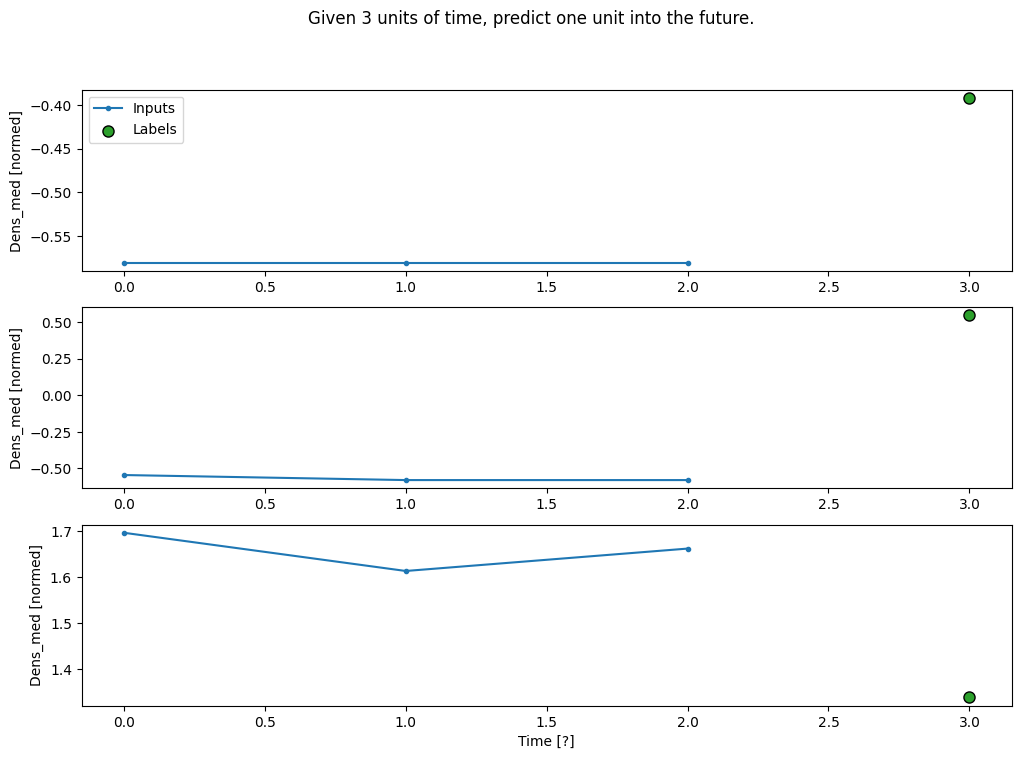

In [120]:
conv_window.plot()
plt.suptitle("Given 3 units of time, predict one unit into the future.")

In [121]:
multi_step_dense = tf.keras.Sequential([
    # Shape: (time, features) => (time*features)
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=27, activation='relu'),
    tf.keras.layers.Dense(units=27, activation='relu'),
    tf.keras.layers.Dense(units=1),
    # Add back the time dimension
    # Shape: (outputs) => (1, outputs)
    tf.keras.layers.Reshape([1, -1]),
])

In [122]:
print('Input shape:', conv_window.example[0].shape)
print('Output shape:', multi_step_dense(conv_window.example[0]).shape)

Input shape: (32, 3, 27)
Output shape: (32, 1, 1)


In [123]:
history = compile_and_fit(multi_step_dense, conv_window)

IPython.display.clear_output()
val_performance['Multi step dense'] = multi_step_dense.evaluate(conv_window.val, return_dict=True)
performance['Multi step dense'] = multi_step_dense.evaluate(conv_window.test, verbose=0, return_dict=True)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.2874 - mean_absolute_error: 0.8593 


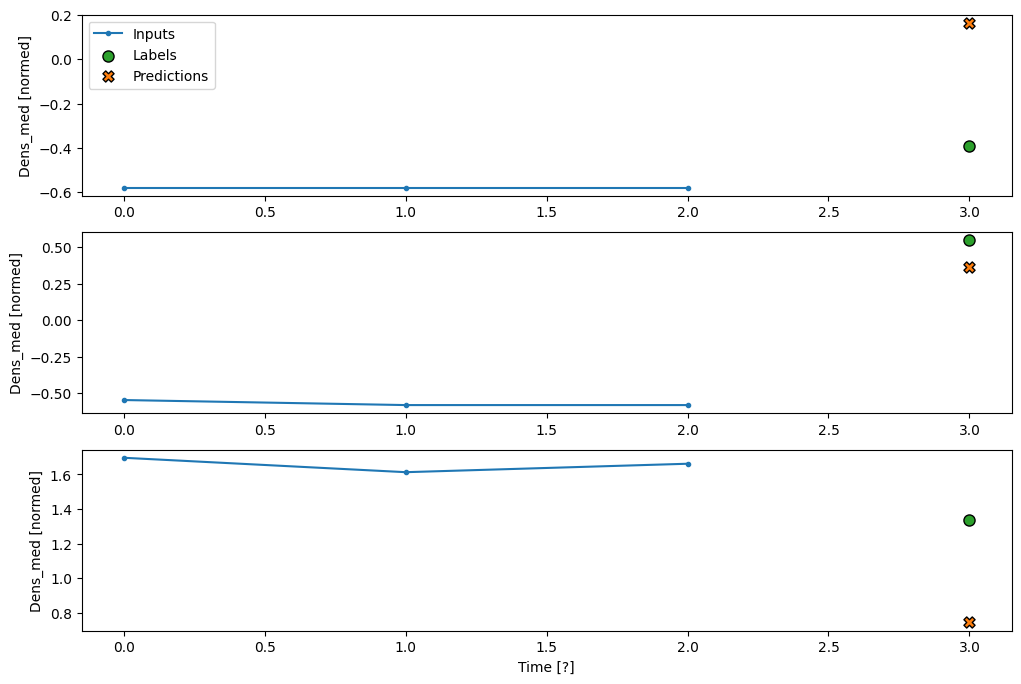

In [124]:
conv_window.plot(multi_step_dense)

In [125]:
print('Input shape:', wide_window.example[0].shape)
try:
  print('Output shape:', multi_step_dense(wide_window.example[0]).shape)
except Exception as e:
  print(f'\n{type(e).__name__}:{e}')

Input shape: (32, 24, 27)

ValueError:Exception encountered when calling Sequential.call().

Input 0 of layer "dense_19" is incompatible with the layer: expected axis -1 of input shape to have value 81, but received input with shape (32, 648)

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(32, 24, 27), dtype=float32)
  • training=None
  • mask=None


# Convolutional neural network

In [126]:
conv_model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=32, 
                           kernel_size=(CONV_WIDTH,),
                           activation='relu'),
    tf.keras.layers.Dense(units=27, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

In [127]:
print("Conv model on `conv_window`")
print('Input shape:', conv_window.example[0].shape)
print('Output shape:', conv_model(conv_window.example[0]).shape)

Conv model on `conv_window`
Input shape: (32, 3, 27)
Output shape: (32, 1, 1)


In [128]:
history = compile_and_fit(conv_model, conv_window)

IPython.display.clear_output()
val_performance['Conv'] = conv_model.evaluate(conv_window.val, return_dict=True)
performance['Conv'] = conv_model.evaluate(conv_window.test, verbose=0, return_dict=True)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.4381 - mean_absolute_error: 0.9074 


In [129]:
print("Wide window")
print('Input shape:', wide_window.example[0].shape)
print('Labels shape:', wide_window.example[1].shape)
print('Output shape:', conv_model(wide_window.example[0]).shape)

Wide window
Input shape: (32, 24, 27)
Labels shape: (32, 24, 27)
Output shape: (32, 22, 1)


In [130]:
LABEL_WIDTH = 24
INPUT_WIDTH = LABEL_WIDTH + (CONV_WIDTH - 1)
wide_conv_window = WindowGenerator(
    input_width=INPUT_WIDTH,
    label_width=LABEL_WIDTH,
    shift=1,
    label_columns=['Dens_med']
)
wide_conv_window

Total window size: 27
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25]
Label indices: [ 3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26]
Label column name(s) ['Dens_med']

In [131]:
print("Wide conv window")
print('Input shape:', wide_conv_window.example[0].shape)
print('Labels shape:', wide_conv_window.example[1].shape)
print('Output shape:', conv_model(wide_conv_window.example[0]).shape)


Wide conv window
Input shape: (32, 26, 27)
Labels shape: (32, 24, 27)
Output shape: (32, 24, 1)


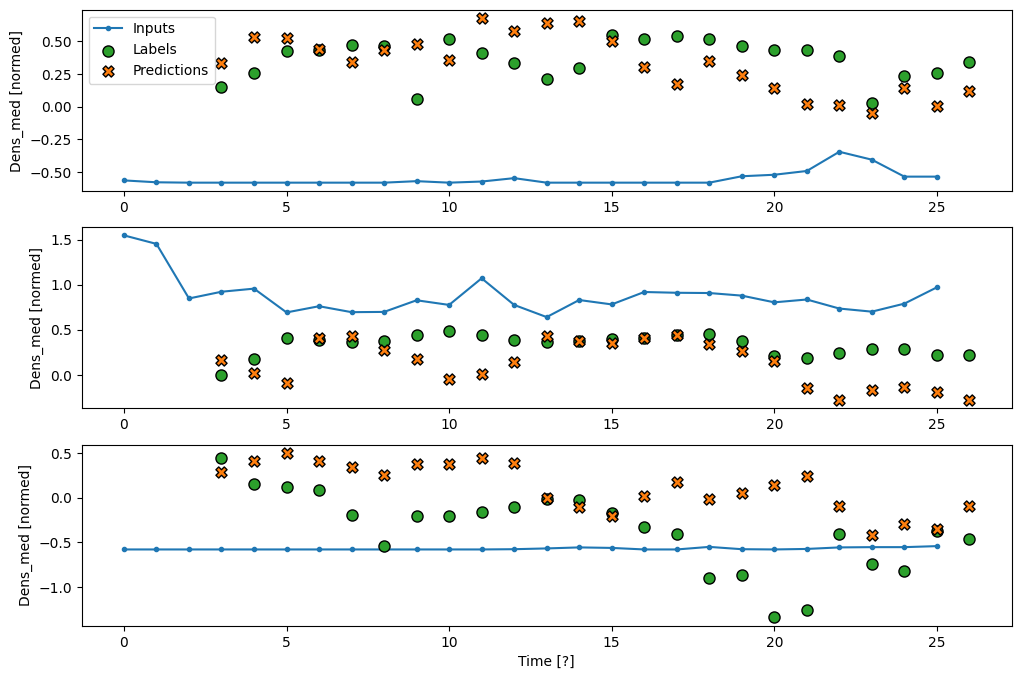

In [132]:
wide_conv_window.plot(conv_model)

# Recurrent Neural Network

In [133]:
lstm_model = tf.keras.models.Sequential([tf.keras.layers.LSTM(27, return_sequences=True), tf.keras.layers.Dense(units=1)])

In [134]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', lstm_model(wide_window.example[0]).shape)

Input shape: (32, 24, 27)
Output shape: (32, 24, 1)


In [135]:
history = compile_and_fit(lstm_model, wide_window)
IPython.display.clear_output()
val_performance['LSTM'] = lstm_model.evaluate(wide_window.val, return_dict=True)
performance['LSTM'] = lstm_model.evaluate(wide_window.test, verbose=0, return_dict=True)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.2769 - mean_absolute_error: 0.8594 


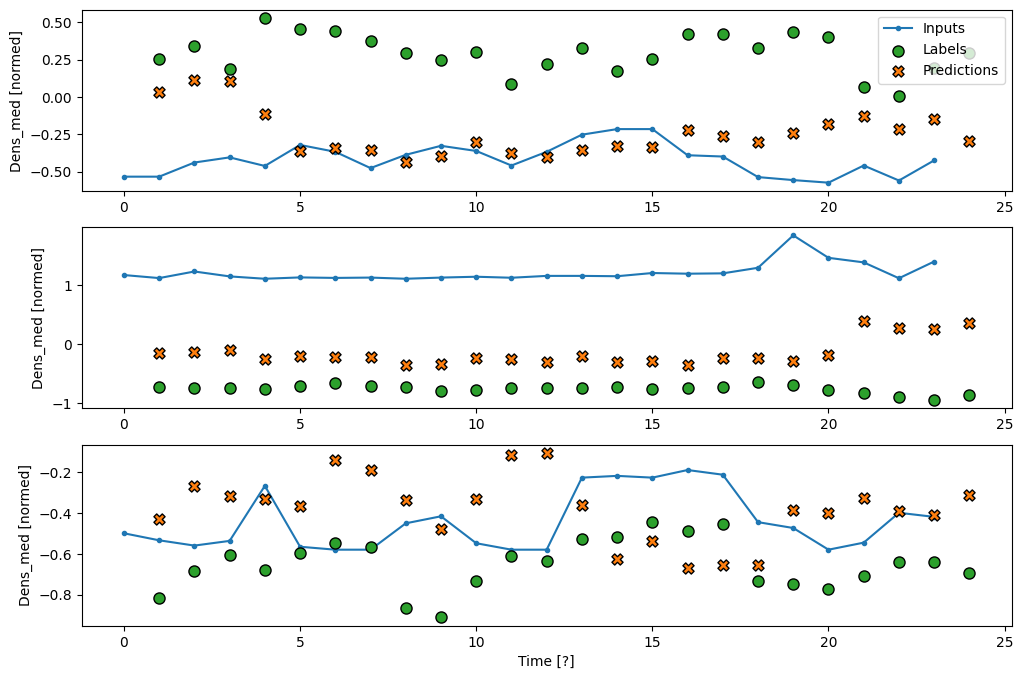

In [136]:
wide_window.plot(lstm_model)

# Performance

In [137]:
cm = lstm_model.metrics[1]
cm.metrics

[<MeanAbsoluteError name=mean_absolute_error>]

In [138]:
val_performance

{'Baseline': {'loss': 3.4372401237487793,
  'mean_absolute_error': 1.3687405586242676},
 'Linear': {'loss': 1.396824598312378,
  'mean_absolute_error': 0.8920397162437439},
 'Dense': {'loss': 0.5652820467948914,
  'mean_absolute_error': 0.5345640182495117},
 'Multi step dense': {'loss': 1.377628207206726,
  'mean_absolute_error': 0.8814582228660583},
 'Conv': {'loss': 1.3765113353729248,
  'mean_absolute_error': 0.8815730810165405},
 'LSTM': {'loss': 1.2087793350219727,
  'mean_absolute_error': 0.8447855114936829}}

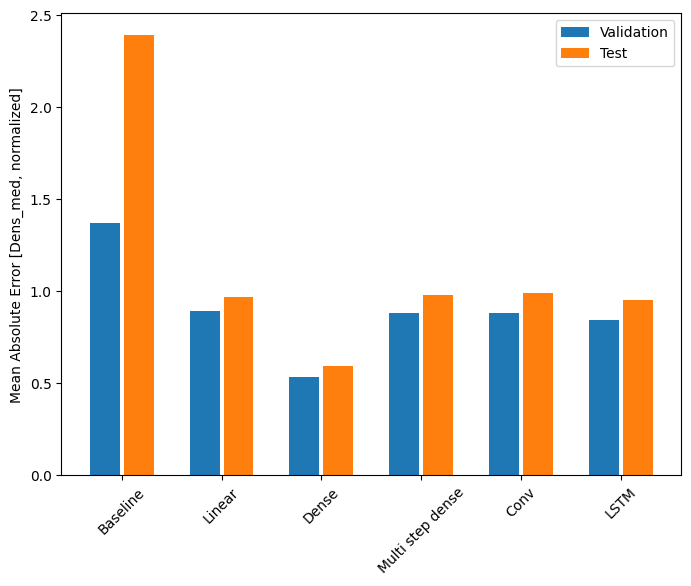

In [139]:
x = np.arange(len(performance))
width = 0.3
metric_name = 'mean_absolute_error'
val_mae = [v[metric_name] for v in val_performance.values()]
test_mae = [v[metric_name] for v in performance.values()]

plt.ylabel('Mean Absolute Error [Dens_med, normalized]')
plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=performance.keys(), rotation=45)
_ = plt.legend()

In [140]:
for name, value in performance.items():
    print(f'{name:12s}: {value[metric_name]:0.4f}')

Baseline    : 2.3901
Linear      : 0.9691
Dense       : 0.5958
Multi step dense: 0.9803
Conv        : 0.9888
LSTM        : 0.9502


# Multi-output Models

In [141]:
single_step_window = WindowGenerator(input_width=1, label_width=1, shift=1)

wide_window = WindowGenerator(input_width=24, label_width=24, shift=1)

for example_inputs, example_labels in wide_window.train.take(1):
    print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
    print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 24, 27)
Labels shape (batch, time, features): (32, 24, 27)


2025-04-02 20:06:13.590561: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


## Baseline

In [142]:
baseline = Baseline()
baseline.compile(loss=tf.keras.losses.MeanSquaredError(),
                 metrics=[tf.keras.metrics.MeanAbsoluteError()])

In [143]:
val_performance = {}
performance = {}
val_performance['Baseline'] = baseline.evaluate(wide_window.val, return_dict=True)
performance['Baseline'] = baseline.evaluate(wide_window.test, verbose=0, return_dict=True)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1649 - mean_absolute_error: 0.2071  


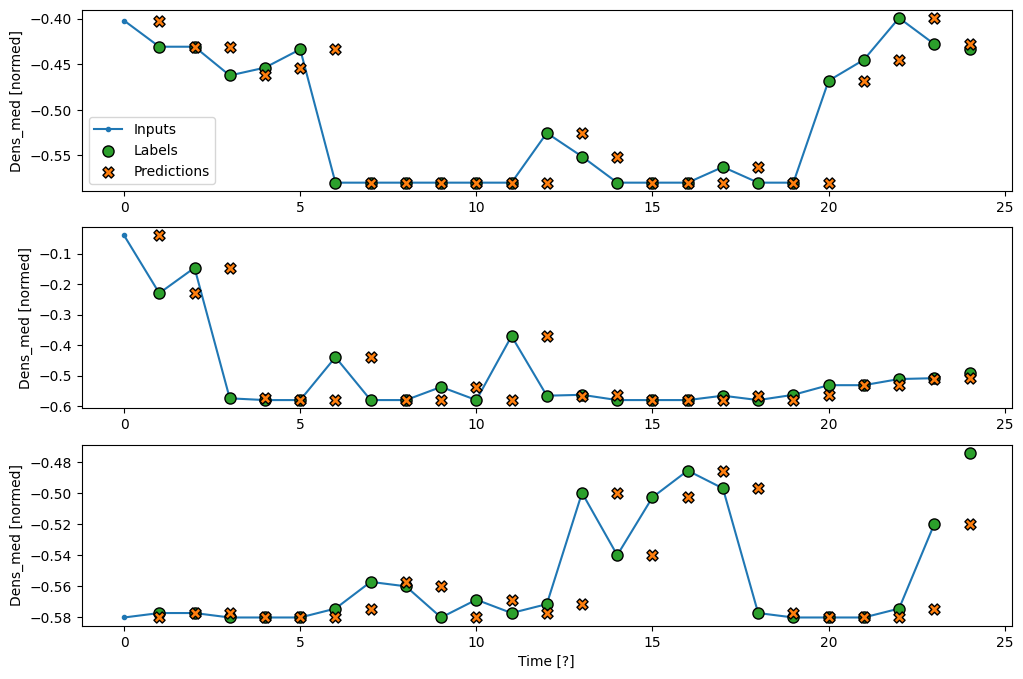

In [147]:
wide_window.plot(baseline)

## Dense

In [144]:
dense = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu'), 
    tf.keras.layers.Dense(units=64, activation="relu"),
    tf.keras.layers.Dense(units=num_features)
])

In [145]:
history = compile_and_fit(dense, single_step_window)
IPython.display.clear_output()
val_performance['Dense'] = dense.evaluate(single_step_window.val, return_dict=True)
performance['Dense'] = dense.evaluate(single_step_window.test, verbose=0, return_dict=True)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1352 - mean_absolute_error: 0.2254 


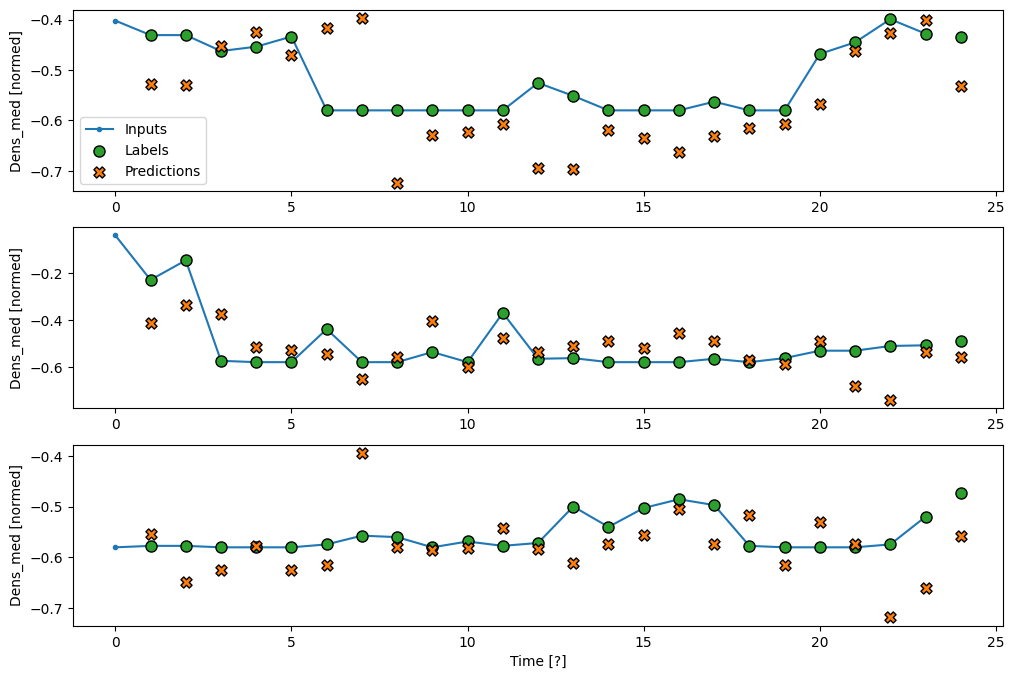

In [148]:
wide_window.plot(dense)

## RNN

In [146]:
%%time
wide_window = WindowGenerator(
    input_width=24, label_width=24, shift=1)

lstm_model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(32, return_sequences=True),
    # Shape => [batch, time, features]
    tf.keras.layers.Dense(units=num_features)
])

history = compile_and_fit(lstm_model, wide_window)

IPython.display.clear_output()
val_performance['LSTM'] = lstm_model.evaluate( wide_window.val, return_dict=True)
performance['LSTM'] = lstm_model.evaluate( wide_window.test, verbose=0, return_dict=True)

print()

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1239 - mean_absolute_error: 0.2226 

CPU times: user 24.8 s, sys: 4.24 s, total: 29.1 s
Wall time: 11.6 s


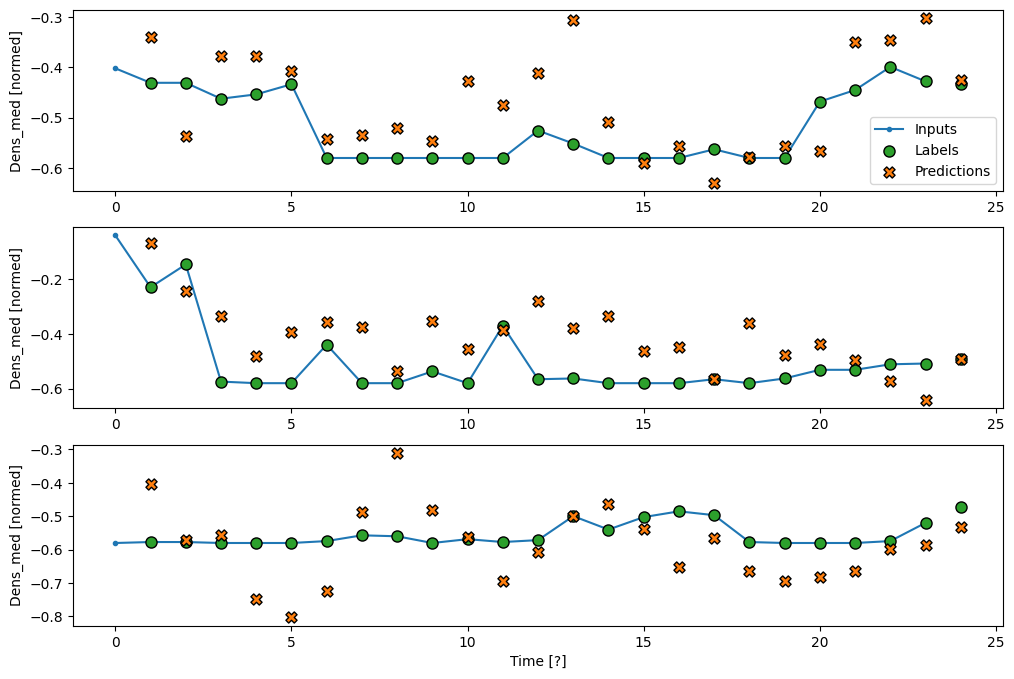

In [149]:
wide_window.plot(lstm_model)